In [1]:
# 1. Get essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from vnstock import *

Observations:  1385


<Axes: xlabel='Time'>

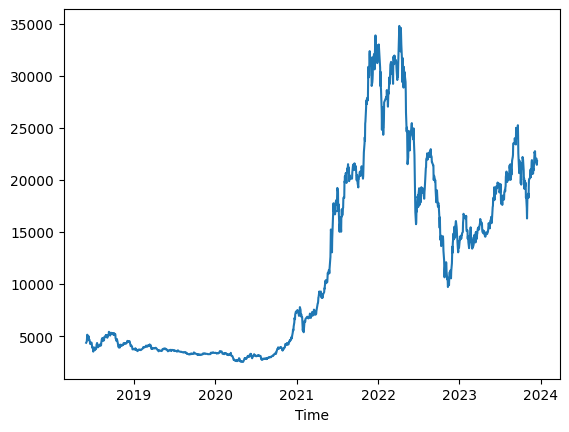

In [2]:
#2. Fetch data and visualize
VND = stock_historical_data(symbol = "VND", start_date="2018-06-01", end_date="2023-12-15", resolution="1D", type = "stock", beautify=True, decor=True, source = "DNSE")
from matplotlib import pyplot
print("Observations: ",len(VND['Close']))
VND
VND["Close"].plot()

In [3]:
VND['Lag'] = np.arange(len(VND.index))
VND = VND[['Close', 'Lag']]
VND

VND = pd.DataFrame(VND)
VND.set_index("Lag", inplace= True)
VND

,Close
Lag,
0,4370
1,4500
2,4810
3,5140
4,4890
...,...
1380,21950
1381,22050
1382,21600


In [5]:
#3. Slit the data into train : test with ratio 8:2
train_size = int(0.6 * len(VND))
test_size = int(0.4 * len(VND))

train_data = VND[:train_size]
test_data = VND[train_size:]

In [6]:
#4. Training process
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [7]:
# 5. Testing process
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)
y_pred = model.predict(x_test)
y_pred

array([[10525.25103446],
       [10536.81083443],
       [10548.3706344 ],
       [10559.93043437],
       [10571.49023433],
       [10583.0500343 ],
       [10594.60983427],
       [10606.16963424],
       [10617.7294342 ],
       [10629.28923417],
       [10640.84903414],
       [10652.40883411],
       [10663.96863408],
       [10675.52843404],
       [10687.08823401],
       [10698.64803398],
       [10710.20783395],
       [10721.76763391],
       [10733.32743388],
       [10744.88723385],
       [10756.44703382],
       [10768.00683378],
       [10779.56663375],
       [10791.12643372],
       [10802.68623369],
       [10814.24603366],
       [10825.80583362],
       [10837.36563359],
       [10848.92543356],
       [10860.48523353],
       [10872.04503349],
       [10883.60483346],
       [10895.16463343],
       [10906.7244334 ],
       [10918.28423337],
       [10929.84403333],
       [10941.4038333 ],
       [10952.96363327],
       [10964.52343324],
       [10976.0832332 ],


In [8]:
# 6. 60 days prediction
last_index =  VND.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+60, step=1)

# Create an array of 60 consecutive integers starting from last_index
x_next_60_days = np.array(range(last_index+1, last_index+61)).reshape(-1, 1)

# Predict the closing prices for the next 60 days
y_next_60_days = model.predict(x_next_60_days)

# Print the predicted closing prices for the next 60 days
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

Predicted closing prices for the next 60 days:
[[16929.38021658]
 [16940.94001654]
 [16952.49981651]
 [16964.05961648]
 [16975.61941645]
 [16987.17921641]
 [16998.73901638]
 [17010.29881635]
 [17021.85861632]
 [17033.41841629]
 [17044.97821625]
 [17056.53801622]
 [17068.09781619]
 [17079.65761616]
 [17091.21741612]
 [17102.77721609]
 [17114.33701606]
 [17125.89681603]
 [17137.45661599]
 [17149.01641596]
 [17160.57621593]
 [17172.1360159 ]
 [17183.69581587]
 [17195.25561583]
 [17206.8154158 ]
 [17218.37521577]
 [17229.93501574]
 [17241.4948157 ]
 [17253.05461567]
 [17264.61441564]
 [17276.17421561]
 [17287.73401557]
 [17299.29381554]
 [17310.85361551]
 [17322.41341548]
 [17333.97321545]
 [17345.53301541]
 [17357.09281538]
 [17368.65261535]
 [17380.21241532]
 [17391.77221528]
 [17403.33201525]
 [17414.89181522]
 [17426.45161519]
 [17438.01141516]
 [17449.57121512]
 [17461.13101509]
 [17472.69081506]
 [17484.25061503]
 [17495.81041499]
 [17507.37021496]
 [17518.93001493]
 [17530.4898149 ]

In [9]:
# 7. Evaluation
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

#MAPE
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Testing MAPE:', test_mape)

#MAE
test_mae = np.mean(np.abs(y_pred - y_test))
print('Testing MAE:', test_mae)

Testing RMSE: 10117.617247383752
Testing MAPE: 30.257181759350743
Testing MAE: 7463.318383230374


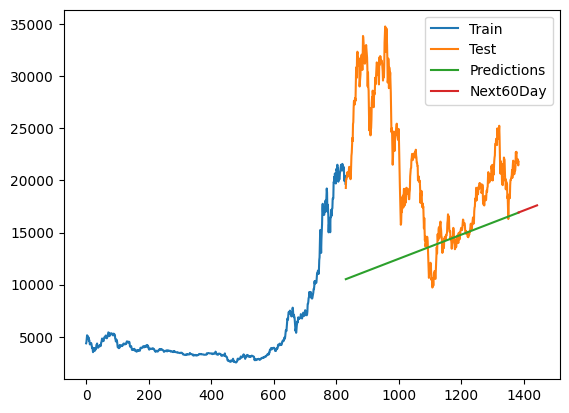

In [10]:
# 8.Visualize the result
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_60_days)
plt.legend(['Train', 'Test','Predictions', 'Next60Day'])
plt.show()